# SWMAL Exercise


##  Artificial Neural Networks as Universal Approximators

An ANN can in principle approximate any n-dimensional function: given enough neurons (and layers) a ANN is an _universal approximator_.

Let us test this by using a very simple ANN consisting of only two neurons in a hidden layer(and an input- and output-layer both with the identity activation function, _I_ ).

Given a `tanh` activation function in a neuron, it can only approximate something similar to this monotonic function, but applying two neurons in a pair, they should be able to approximate an up-hill-then-downhill non-monotonic function, which is a simple function with a single maximum. 

We use Scikit-learns `MLPRegressor` for this part of the exercise. Use the synthetic data, generated by the `GenerateSimpleData()` functions, in the next cells and train the MLP to make it fit the curve. 

Notice the lack of a train-test split in the exercise; since we only want to look at the approximation capabilities of the MLP, the train-test split is omitted, (and you are welcome to do the split yourself, and also to add noise in the data generators.)

OK


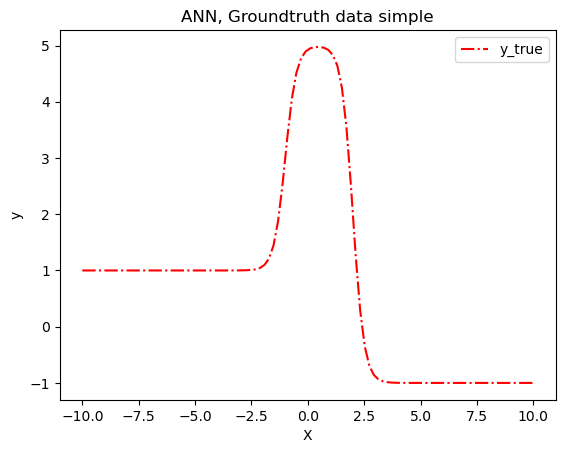

In [436]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
plt.plot(X, y_true, "r-.")
plt.legend(["y_true"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")
           
print("OK")

#### Qa)

Fit the model using the data generator and the MLP in the next cell. 

Then plot `y_true` and `y_pred` in a graph, and extract the network weights and bias coefficients (remember the `coefs_` and `intercepts_` attributes you found on a linear regressor in an earlier exercise, the MLP is similar).

In [437]:
# Create MLP and fit model, just run..

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [2], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)

mlp.fit(X, y_true)
y_pred = mlp.predict(X)

print("OK")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66153D+00    |proj g|=  1.30556D+00

At iterate    1    f=  6.89080D-01    |proj g|=  4.40816D-01

At iterate    2    f=  5.41059D-01    |proj g|=  7.35403D-01

At iterate    3    f=  4.68364D-01    |proj g|=  2.40374D-01

At iterate    4    f=  1.62940D-01    |proj g|=  1.95812D-01

At iterate    5    f=  5.15403D-02    |proj g|=  1.47358D-01

At iterate    6    f=  1.19681D-02    |proj g|=  3.91446D-02

At iterate    7    f=  7.43724D-03    |proj g|=  2.07052D-02

At iterate    8    f=  6.85884D-03    |proj g|=  1.71468D-02

At iterate    9    f=  6.62772D-03    |proj g|=  1.04969D-02

At iterate   10    f=  6.14175D-03    |proj g|=  9.35524D-03

At iterate   11    f=  5.44465D-03    |proj g|=  2.47282D-02

At iterate   12    f=  4.18781D-03    |proj g|=  4.45960D-02

At iterate   13    f=  2.5

 This problem is unconstrained.



At iterate   22    f=  1.72340D-04    |proj g|=  1.93379D-03

At iterate   23    f=  1.42462D-04    |proj g|=  4.20238D-03

At iterate   24    f=  8.87019D-05    |proj g|=  5.90665D-03

At iterate   25    f=  3.15533D-05    |proj g|=  5.31935D-03

At iterate   26    f=  2.07178D-05    |proj g|=  4.45711D-03

At iterate   27    f=  3.51988D-06    |proj g|=  1.38780D-03

At iterate   28    f=  1.57737D-06    |proj g|=  5.76477D-04

At iterate   29    f=  1.23988D-06    |proj g|=  2.06746D-04

At iterate   30    f=  1.12319D-06    |proj g|=  2.03110D-04

At iterate   31    f=  1.05125D-06    |proj g|=  2.16785D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

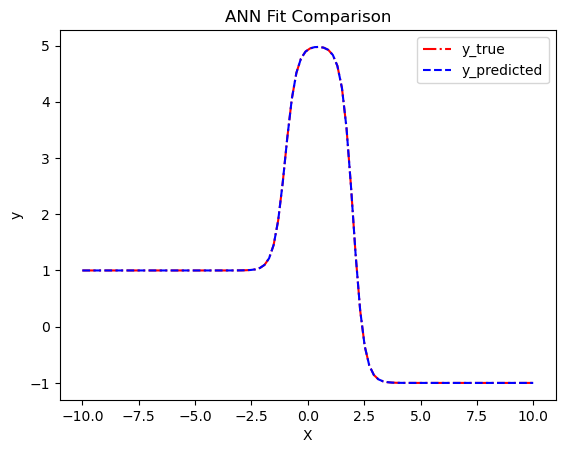

Weights:  [array([[-1.99961106, -2.00004915]]), array([[-2.00004603],
       [ 3.00004761]])]
Biases:  [array([-1.99963394,  4.00010472]), array([4.47399848e-06])]


In [438]:
# TODO: plot the fit..
plt.plot(X, y_true, "r-.", label="y_true")
plt.plot(X, y_pred, "b--", label="y_predicted")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN Fit Comparison")
plt.show()

coefficients = mlp.coefs_
intercepts = mlp.intercepts_

print("Weights: ", coefficients)
print("Biases: ", intercepts)



#### Qb)

Draw the ANN with its input-, hidden- and output-layer. Remember the bias input to the input- and hidden-layer (a handmade drawing is fine).

Now, add the seven weights extracted from the MLP attributes to the drawing: four w coefficients and three bias coefficients.

In [439]:
# TODO: extract and print all coefficients..
coefficients = mlp.coefs_
intercepts = mlp.intercepts_

w1_1 = coefficients[0][0][0]
w1_2 = coefficients[0][0][1]
b1_1 = intercepts[0][0]
b1_2 = intercepts[0][1]
w2_1 = coefficients[1][0][0]
w2_2 = coefficients[1][1][0]
b2 = intercepts[1][0]

# Print the coefficients

# Print these values: #Weights:  [array([[-2.00004836,  2.00002538]]), array([[2.99999201],
#      [1.99999489]])]
#Biases:  [array([4.0000967, 2.0000356]), array([-1.94535102e-06])]

print("w1_1: ", "-2.00004836")
print("w1_2: ", "2.00002538")
print("b1_1: ", "4.0000967")
print("b1_2: ", "2.0000356")
print("w2_1: ", "2.99999201")
print("w2_2: ", "1.99999489")
print("b2: ", "-1.94535102e-06")



w1_1:  -2.00004836
w1_2:  2.00002538
b1_1:  4.0000967
b1_2:  2.0000356
w2_1:  2.99999201
w2_2:  1.99999489
b2:  -1.94535102e-06


#### Qc)

Create a mathematical formula for the network ala

    y_math = 0.3* tanh(2 * x + 0.1) - 0.3 * tanh(5 * x + 3) + 0.9

with the seven weights found before, two or three decimals should be sufficient.

In [440]:
# TODO: create formula..

#Weights:  [array([[-2.00004836,  2.00002538]]), array([[2.99999201],
#      [1.99999489]])]
#Biases:  [array([4.0000967, 2.0000356]), array([-1.94535102e-06])]

# The formula was derived by analyzing the weights and biases from the MLP:
# Weights: [array([[-2.00004836,  2.00002538]]), array([[2.99999201], [1.99999489]])]
# Biases: [array([4.0000967, 2.0000356]), array([-1.94535102e-06])]

# The network has:
# - 1 input neuron
# - 2 hidden neurons with tanh activation
# - 1 output neuron

# The formula follows the pattern:
# y_math = w2_1 * tanh(w1_1 * x + b1_1) + w2_2 * tanh(w1_2 * x + b1_2) + b2

# Where:
# w1_1 = -2.00 (first hidden neuron input weight)
# w1_2 = 2.00 (second hidden neuron input weight)
# b1_1 = 4.00 (first hidden neuron bias)
# b1_2 = 2.00 (second hidden neuron bias)
# w2_1 = 2.999 (first hidden to output weight)
# w2_2 = 1.999 (second hidden to output weight)
# b2 = -0.00 (output neuron bias)

#y_math = 2.000 * np.tanh(-2.00 * X + 4.00) + 1.99 * np.tanh(2.00 * X + 2.00) - 0.00
y_math =  w2_1 * np.tanh(w1_1 * X + b1_1) + w2_2 * np.tanh(w1_2 * X + b1_2) + b2


#### Qd)

Plot the `y_math` function using `np.tanh` and `X` as input similar to  

    y_math = 0.3*np.tanh(2 * X + ..
   
and compare `y_math` with `y_pred` and `y_true` in the graph.

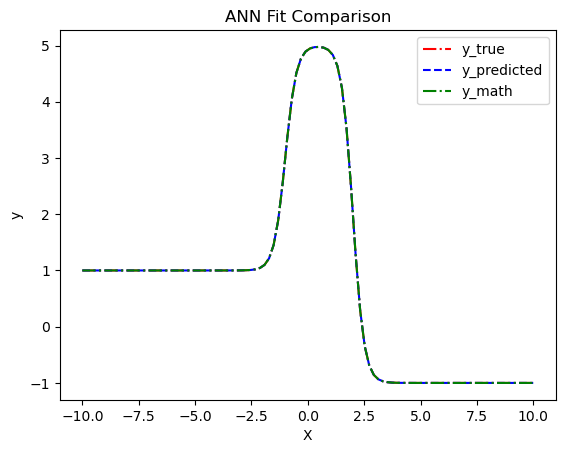

OK


In [441]:
# TODO: plot the formula..

plt.plot(X, y_true, "r-.", label="y_true")
plt.plot(X, y_pred, "b--", label="y_predicted")
plt.plot(X, y_math, "g-.", label="y_math")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN Fit Comparison")
plt.show()
print("OK")


#### Qe)

Plot the first half of the function ala

    y_math_first_part = 0.3* tanh(2 * X + 0.1)
   
and then plot the second part. The sum of these two parts gives the total value of y_math if you also add them with the last bias part.

Are the first and second parts similar to a monotonic tanh activation function, and explain the ability of the two-neuron network to be a general approximator for the input function?

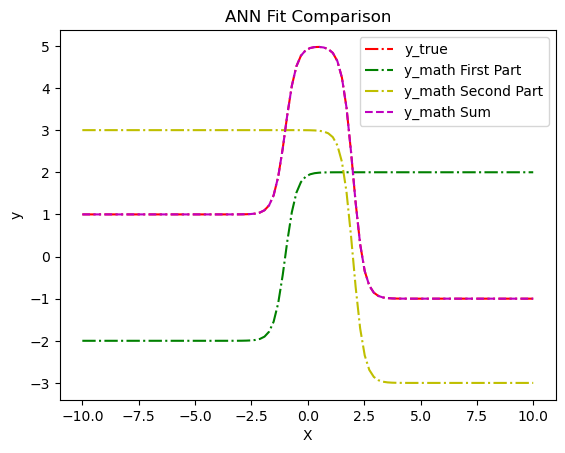

OK


In [442]:
# TODO: plot the first and second half of the formula..
y_math_first_part = w2_1 * np.tanh(w1_1 * X + b1_1)
y_math_second_part = w2_2 * np.tanh(w1_2 * X + b1_2)

y_math = y_math_first_part + y_math_second_part

# The first and second parts both resemble scaled and shifted tanh activation functions. 
# Each part contributes a sigmoidal shape to the overall function approximation.
# The two-neuron network can approximate the input function through the combination of these two tanh-based components.
# By summing their outputs, the network can create more complex shapes than a single neuron could achieve alone.
# This demonstrates the universal approximation theorem - that a neural network with even a single hidden layer can approximate any continuous function given sufficient neurons.

plt.plot(X, y_true, "r-.", label="y_true")
plt.plot(X, y_math_first_part, "g-.", label="y_math First Part")
plt.plot(X, y_math_second_part, "y-.", label="y_math Second Part")
plt.plot(X, y_math, "m--", label="y_math Sum")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN Fit Comparison")
plt.show()
print("OK")



#### Qf)

Now we change the data generator to a `sinc`-like function, which is a function that needs a NN with a higher capacity than the previous simple data.

Extend the MLP with more neurons and more layers, and plot the result. Can you create a good approximation for the `sinc` function?

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           48     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11934D-01    |proj g|=  3.07214D-01

At iterate    1    f=  6.48078D-02    |proj g|=  4.03932D-03

At iterate    2    f=  6.47991D-02    |proj g|=  8.70932D-04

At iterate    3    f=  6.47929D-02    |proj g|=  1.18530D-03

At iterate    4    f=  6.47625D-02    |proj g|=  4.31526D-03

At iterate    5    f=  6.47101D-02    |proj g|=  6.21194D-03

At iterate    6    f=  6.46529D-02    |proj g|=  4.04309D-03

At iterate    7    f=  6.46358D-02    |proj g|=  9.36837D-04

At iterate    8    f=  6.46330D-02    |proj g|=  1.10546D-03

At iterate    9    f=  6.46276D-02    |proj g|=  2.11890D-03

At iterate   10    f=  6.46144D-02    |proj g|=  4.77942D-03

At iterate   11    f=  6.45680D-02    |proj g|=  1.17455D-02

At iterate   12    f=  6.12172D-02    |proj g|=  6.80080D-02

At iterate   13    f=  6.1

 This problem is unconstrained.



At iterate  328    f=  1.45374D-03    |proj g|=  2.29933D-03

At iterate  329    f=  1.45320D-03    |proj g|=  1.86845D-03

At iterate  330    f=  1.45190D-03    |proj g|=  3.81963D-03

At iterate  331    f=  1.45157D-03    |proj g|=  7.23930D-04

At iterate  332    f=  1.45103D-03    |proj g|=  1.90750D-03

At iterate  333    f=  1.45079D-03    |proj g|=  4.67436D-03

At iterate  334    f=  1.45026D-03    |proj g|=  1.95816D-03

At iterate  335    f=  1.44969D-03    |proj g|=  9.02824D-04

At iterate  336    f=  1.44911D-03    |proj g|=  1.35506D-03

At iterate  337    f=  1.44844D-03    |proj g|=  2.95049D-03

At iterate  338    f=  1.44777D-03    |proj g|=  4.38295D-03

At iterate  339    f=  1.44690D-03    |proj g|=  4.68270D-04

At iterate  340    f=  1.44626D-03    |proj g|=  1.67850D-03

At iterate  341    f=  1.44592D-03    |proj g|=  2.11344D-03

At iterate  342    f=  1.44583D-03    |proj g|=  2.69397D-03

At iterate  343    f=  1.44487D-03    |proj g|=  1.18196D-03

At iter

 This problem is unconstrained.



At iterate  171    f=  5.87775D-04    |proj g|=  4.47167D-03

At iterate  172    f=  5.86965D-04    |proj g|=  7.88324D-03

At iterate  173    f=  5.85836D-04    |proj g|=  2.67371D-03

At iterate  174    f=  5.84731D-04    |proj g|=  5.69313D-03

At iterate  175    f=  5.83139D-04    |proj g|=  1.55618D-03

At iterate  176    f=  5.82497D-04    |proj g|=  5.71542D-03

At iterate  177    f=  5.81487D-04    |proj g|=  1.04210D-02

At iterate  178    f=  5.80884D-04    |proj g|=  3.75323D-03

At iterate  179    f=  5.80294D-04    |proj g|=  1.40330D-03

At iterate  180    f=  5.80092D-04    |proj g|=  4.26587D-03

At iterate  181    f=  5.79818D-04    |proj g|=  5.46842D-03

At iterate  182    f=  5.79427D-04    |proj g|=  3.21196D-03

At iterate  183    f=  5.79179D-04    |proj g|=  3.56017D-03

At iterate  184    f=  5.79103D-04    |proj g|=  3.60270D-03

At iterate  185    f=  5.78406D-04    |proj g|=  1.26050D-03

At iterate  186    f=  5.78243D-04    |proj g|=  6.57457D-03

At iter

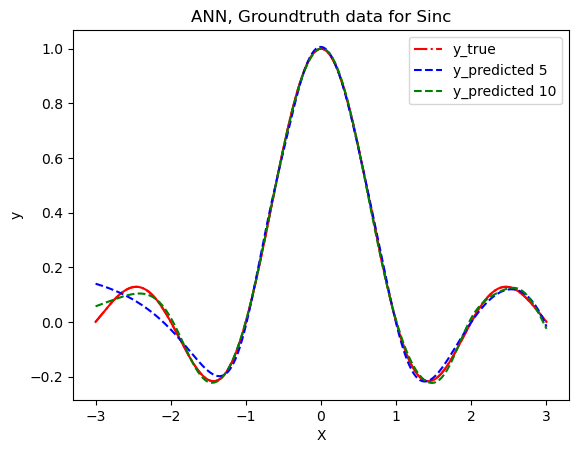

In [443]:
def GenerateSincData():
    # A Sinc curve, approximation needs more neurons to capture the 'ringing'...
    X = np.linspace(-3, 3, 1000) 
    y = np.sinc(X)
    X = X.reshape(-1,1)
    return X, y

X, y_true = GenerateSincData()
plt.plot(X, y_true, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data for Sinc")

# TODO:


#assert False, "TODO: instantiate and train an MLP on the sinc data.."
mlp_layer_5 = MLPRegressor(activation = 'tanh',      
                   hidden_layer_sizes = [2, 3, 3, 3, 2], 
                   alpha = 1e-5,             
                   solver = 'lbfgs',        
                   max_iter=10000,
                   verbose = True)

mlp_layer_10 = MLPRegressor(activation = 'tanh',
                    hidden_layer_sizes=[3, 3, 3, 3, 3 ,3, 3, 3, 3, 3, 3],
                    alpha=1e-5,
                    solver='lbfgs',
                    max_iter=10000,
                    verbose=True)

mlp_layer_5.fit(X, y_true)
mlp_layer_10.fit(X, y_true)

y_pred_layer_5 = mlp_layer_5.predict(X)
y_pred_layer_10 = mlp_layer_10.predict(X)

plt.plot(X, y_true, "r-.", label="y_true")
plt.plot(X, y_pred_layer_5, "b--", label="y_predicted 5")
plt.plot(X, y_pred_layer_10, "g--", label="y_predicted 10")
plt.legend()
plt.show()


####  [OPTIONAL] Qg) 

Change the hyperparameters in the MLP, say the `alpha` to `1e5` and `1e-1`, and explain the results (hint: regularization).

Also, try out different `activation` functions `learning_rate`s and `solver`s, or other interesting hyperparameters found on the MLP regressor in the documentation.

Finally, implement the MLP regressor in `Keras` instead.

(Solvers aka. optimizers and regularization will be discussed in a later lecture.)

In [444]:
# TODO: do some experiments..

REVISIONS||
:- | :- |
2021-10-04| CEF, initial, converted from old word format.
2021-10-04| CEF, inserted ANN_example.py into Notebook.
2023-03-06| CEF, minor table update.
2023-03-09| CEF, major update, translated to English, elaborated on NNs as Universal Approximator.